# Regresion Lineal Simple
## Carga de los datos
|  Atributo  |        Descripción         |
|------------|----------------------------|
|precio|Valor de la propiedad en miles de US$|
|tasa_crimen|Proporción de crimenes en el vecindario|
|area_resid|Proporcion del área residencial en la localidad|
|cal_aire|Calidad del aire en el vecindario|
|num_hab|Promedio de habitaciones en las propiedades de la localidad|
|edad|Antiguedad de la casa en años|
|dist1|Distancia al centro de empleo 1|
|dist2|Distancia al centro de empleo 2|
|dist3|Distancia al centro de empleo 3|
|dist4|Distancia al centro de empleo 4|
|prof_mil|Cantidad de profesores por cada 1.000 habitantes de la localidad|
|p_pobreza|Proporción de pobreza en la localidad|
|aeropuerto|Existencia de aropuerto en la localidad (SI/NO)|
|n_cam_hos|Número de camas en los hospitales de la localidad por cada 1.000 habitantes|
|n_hab_hotel|Número de habitaciones de hotel en la localidad por cada 1.000 habitantes|
|cuerpo_agua|Cuerpo natural de agua más cercano|
|lluvia_ano|Promedio anual de centimetros de agua lluvia en la localidad|
|ter_bus|Existencia de terminal de buses en la localidad (SI/NO)|
|parque|Proporción de tierra asignada en la localidad para parques|




In [2]:
import os # Importar modulo para tener acceso a las funciones del sistena operativo
os.getcwd()

'/home/javier/git/learning_ml/Mod2S1'

In [3]:
# os.chdir('/home/javier/git/..') 

In [4]:
import pandas as pn
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [5]:
url ='https://raw.githubusercontent.com/JASDataCTG/Diplomado-ML/main/Modulo%202/Datasets/precio_casa_reg.csv'
df = pn.read_csv(url,header=0) # ... sep = ';') # Crear el dataframe

In [6]:
df.head(n=10) # Ver las primeras 5 filas del dataset, n # filas a mostrar

,precio,tasa_crimen,area_resid,cal_aire,num_hab,edad,dist1,dist2,dist3,dist4,prof_mil,p_pobreza,aeropuerto,n_cam_hos,n_hab_hotel,cuerpo_agua,lluvia_ano,ter_bus,parque
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,SI,5.480,11.1920,Rio,23,SI,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lago,42,SI,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,Ninguno,38,SI,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,SI,9.268,11.2672,Lago,45,SI,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lago,55,SI,0.039474
5,28.7,0.02985,32.18,0.458,6.430,58.7,6.22,5.80,6.23,5.99,21.3,5.21,SI,7.174,14.2296,Ninguno,53,SI,0.045910
6,22.9,0.08829,37.87,0.524,6.012,66.6,5.87,5.47,5.70,5.20,24.8,12.43,SI,6.958,12.1832,Rio,41,SI,0.052170
7,22.1,0.14455,37.87,0.524,6.172,96.1,6.04,5.85,6.25,5.66,24.8,19.15,NO,5.842,12.1768,Lago,56,SI,0.057075
8,16.5,0.21124,37.87,0.524,5.631,100.0,6.18,5.85,6.30,6.00,24.8,29.93,SI,5.930,12.1320,Ninguno,55,SI,0.056302
9,18.9,0.17004,37.87,0.524,6.004,85.9,6.67,6.55,6.85,6.29,24.8,17.10,SI,9.478,14.1512,Rio,45,SI,0.050727


In [7]:
df.tail() # ver las ultimas filas del dataset

,precio,tasa_crimen,area_resid,cal_aire,num_hab,edad,dist1,dist2,dist3,dist4,prof_mil,p_pobreza,aeropuerto,n_cam_hos,n_hab_hotel,cuerpo_agua,lluvia_ano,ter_bus,parque
501,22.4,0.06263,41.93,0.573,6.593,69.1,2.64,2.45,2.76,2.06,19.0,9.67,NO,9.348,12.1792,Lago y Rio,27,SI,0.056006
502,20.6,0.04527,41.93,0.573,6.120,76.7,2.44,2.11,2.46,2.14,19.0,9.08,SI,6.612,13.1648,Lago y Rio,20,SI,0.059903
503,23.9,0.06076,41.93,0.573,6.976,91.0,2.34,2.06,2.29,1.98,19.0,5.64,NO,5.478,12.1912,Ninguno,31,SI,0.057572
504,22.0,0.10959,41.93,0.573,6.794,89.3,2.54,2.31,2.40,2.31,19.0,6.48,SI,7.940,15.1760,Ninguno,47,SI,0.060694
505,19.0,0.04741,41.93,0.573,6.030,80.8,2.72,2.24,2.64,2.42,19.0,7.88,SI,10.280,10.1520,Ninguno,45,SI,0.060336


In [8]:
df.shape # tamaño de la tabla

(506, 19)

In [9]:
df.info() #  Conocer info de los atributos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   precio       506 non-null    float64
 1   tasa_crimen  506 non-null    float64
 2   area_resid   506 non-null    float64
 3   cal_aire     506 non-null    float64
 4   num_hab      506 non-null    float64
 5   edad         506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  prof_mil     506 non-null    float64
 11  p_pobreza    506 non-null    float64
 12  aeropuerto   506 non-null    object 
 13  n_cam_hos    498 non-null    float64
 14  n_hab_hotel  506 non-null    float64
 15  cuerpo_agua  506 non-null    object 
 16  lluvia_ano   506 non-null    int64  
 17  ter_bus      506 non-null    object 
 18  parque       506 non-null    float64
dtypes: float

##  Resumen estadistico descriptivo de las variables


In [10]:
df.describe() # el cuartil del 50%, mediana para ver si existen outliers
#df[['precio','tasa_crimen']].describe()

,precio,tasa_crimen,area_resid,cal_aire,num_hab,edad,dist1,dist2,dist3,dist4,prof_mil,p_pobreza,n_cam_hos,n_hab_hotel,lluvia_ano,parque
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,5.238957,12.513697,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507
75%,25.000000,3.677083,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711


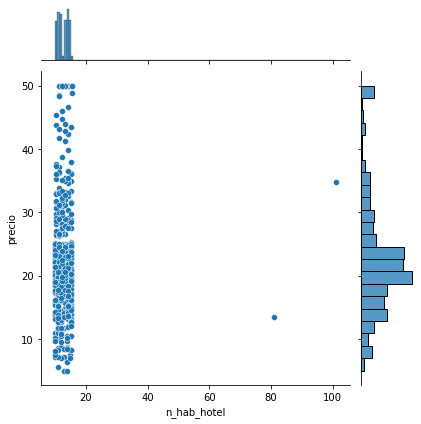

In [11]:
sns.jointplot(x= 'n_hab_hotel', y ='precio', data = df)

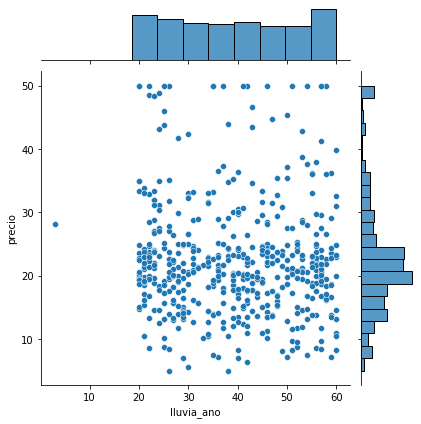

In [12]:
sns.jointplot(x = df['lluvia_ano'], y=df['precio'])

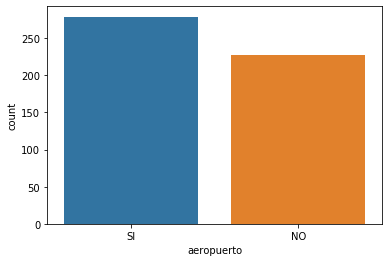

In [13]:
sns.countplot(x= df['aeropuerto'])

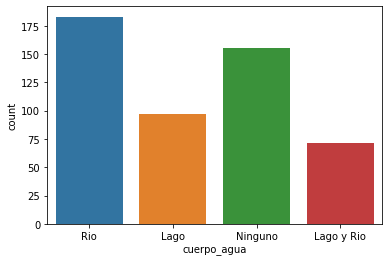

In [14]:
sns.countplot(x= df['cuerpo_agua'])

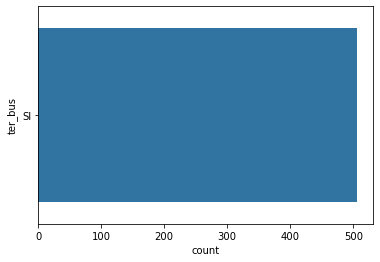

In [15]:
sns.countplot(y= df['ter_bus'])

## Algunas notas sobre los datos que se graficaron

* `n_cam_host` tiene valores nulos
* Valores atípicos en `tasa_crimen`
* Valores atípicos en `lluvia_ano` y `num_hab_hotel`
* `term_bus` tiene un solo valor no aporta información al modelo

## Tratamientos Outlier por perceptil 99

In [17]:
np.percentile(df.n_hab_hotel,[99]) # 

array([15.39952])

In [ ]:
Se obtiene un arreglo, al acceder a la posicion cero de ese array. Percentile divide datos en 100 y escoje el elemento 99

In [19]:
lim_sup = np.percentile(df.n_hab_hotel,[99])[0] # 

In [20]:
df[df.n_hab_hotel > lim_sup] # recupero los datos que cumplen con ese 

,precio,tasa_crimen,area_resid,cal_aire,num_hab,edad,dist1,dist2,dist3,dist4,prof_mil,p_pobreza,aeropuerto,n_cam_hos,n_hab_hotel,cuerpo_agua,lluvia_ano,ter_bus,parque
2,34.7,0.02729,37.07,0.4690,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.12,Ninguno,38,SI,0.045764
166,50.0,2.01019,49.58,0.6050,7.929,96.2,2.11,1.91,2.31,1.86,25.3,3.70,SI,8.300,15.40,Rio,37,SI,0.052105
204,50.0,0.02009,32.68,0.4161,8.034,31.9,5.41,4.80,5.28,4.99,25.3,2.88,SI,8.900,15.40,Rio,51,SI,0.044178
267,50.0,0.57834,33.97,0.5750,8.297,67.0,2.60,2.13,2.43,2.52,27.0,7.44,SI,8.000,15.40,Ninguno,42,SI,0.063235
369,50.0,5.66998,48.10,0.6310,6.683,96.8,1.55,1.28,1.65,0.94,19.8,3.73,SI,6.700,15.40,Rio,58,SI,0.067477
423,13.4,7.05042,48.10,0.6140,6.103,85.1,2.08,1.80,2.34,1.87,19.8,23.29,NO,8.268,81.12,Lago,29,SI,0.063344


Segun la tecnica de percentil 99, se debe tomar la cota de 3 veces ese valor de perceptil y colocar la cota,

In [21]:
df.n_hab_hotel[df.n_hab_hotel > 3*lim_sup] = 3*lim_sup

<ipython-input-21-44f7250b9672>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.n_hab_hotel[df.n_hab_hotel > 3*lim_sup] = 3*lim_sup


In [24]:
np.percentile(df.lluvia_ano,[1])

20.0

In [30]:
lim_inf = np.percentile(df.lluvia_ano, [1])[0]


In [31]:
df[df.lluvia_ano < lim_inf]

,precio,tasa_crimen,area_resid,cal_aire,num_hab,edad,dist1,dist2,dist3,dist4,prof_mil,p_pobreza,aeropuerto,n_cam_hos,n_hab_hotel,cuerpo_agua,lluvia_ano,ter_bus,parque
213,28.1,0.14052,40.59,0.489,6.375,32.3,4.11,3.92,4.18,3.57,21.4,9.38,SI,7.562,10.2248,Ninguno,3,SI,0.044019


Aqui el limite inferior se multiplica por 0.3!!!

In [32]:
df.lluvia_ano[df.lluvia_ano < 0.3*lim_inf] = 0.3*lim_inf

<ipython-input-32-20a093856438>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.lluvia_ano[df.lluvia_ano < 0.3*lim_inf] = 0.3*lim_inf


In [33]:
df[df.lluvia_ano < lim_inf]

,precio,tasa_crimen,area_resid,cal_aire,num_hab,edad,dist1,dist2,dist3,dist4,prof_mil,p_pobreza,aeropuerto,n_cam_hos,n_hab_hotel,cuerpo_agua,lluvia_ano,ter_bus,parque
213,28.1,0.14052,40.59,0.489,6.375,32.3,4.11,3.92,4.18,3.57,21.4,9.38,SI,7.562,10.2248,Ninguno,6,SI,0.044019


graficar precio Vs n_cam_hos,y no hay correlacion, porque se tiene dispersion de los datos, entonces no se hace de acuerdo con la grafica la correcciónd de outliers

### Imputación de valores faltantes 

Tratamiento de valores faltantes

In [35]:
df.n_cam_hos[df.n_cam_hos.isna()]

50    NaN
112   NaN
215   NaN
260   NaN
359   NaN
403   NaN
416   NaN
496   NaN
Name: n_cam_hos, dtype: float64

Se remplazan por los valores de la media

In [36]:
df.n_cam_hos = df.n_cam_hos.fillna(df.n_cam_hos.mean())

Se verifica revisando que se haya completado los elementos

In [37]:
df.n_cam_hos[df.n_cam_hos.isna()]


Series([], Name: n_cam_hos, dtype: float64)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   precio       506 non-null    float64
 1   tasa_crimen  506 non-null    float64
 2   area_resid   506 non-null    float64
 3   cal_aire     506 non-null    float64
 4   num_hab      506 non-null    float64
 5   edad         506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  prof_mil     506 non-null    float64
 11  p_pobreza    506 non-null    float64
 12  aeropuerto   506 non-null    object 
 13  n_cam_hos    506 non-null    float64
 14  n_hab_hotel  506 non-null    float64
 15  cuerpo_agua  506 non-null    object 
 16  lluvia_ano   506 non-null    int64  
 17  ter_bus      506 non-null    object 
 18  parque       506 non-null    float64
dtypes: float

### Transformación de variables

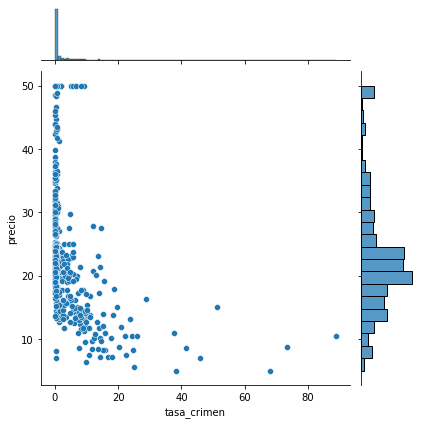

In [39]:
sns.jointplot(x=df['tasa_crimen'], y=df['precio'])

En la figura anterior puede trazar una línea logarítmica, 

### Transformación Logarítmica

In [40]:
df.tasa_crimen = np.log(1+df.tasa_crimen)

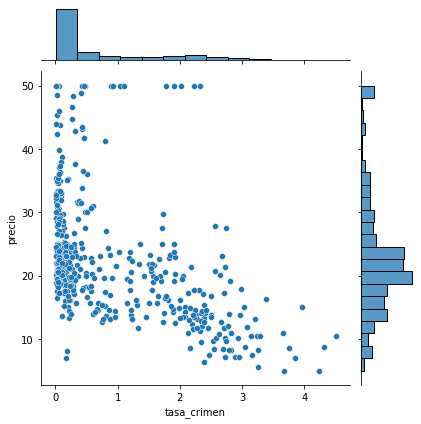

In [41]:
sns.jointplot(x=df['tasa_crimen'], y=df['precio'])


Ahora se observa en la figura anterior, que se transforma a una relación más lineal.

## Crear una nueva columna a partir de otras

In [42]:
df['dist_prom']= (df.dist1 + df.dist2 + df.dist3 + df.dist4)/4

In [43]:
df.head()

,precio,tasa_crimen,area_resid,cal_aire,num_hab,edad,dist1,dist2,dist3,dist4,prof_mil,p_pobreza,aeropuerto,n_cam_hos,n_hab_hotel,cuerpo_agua,lluvia_ano,ter_bus,parque,dist_prom
0,24.0,0.006300,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,SI,5.480,11.19200,Rio,23,SI,0.049347,4.0875
1,21.6,0.026944,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.17280,Lago,42,SI,0.046146,4.9675
2,34.7,0.026924,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,46.19856,Ninguno,38,SI,0.045764,4.9675
3,33.4,0.031857,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,SI,9.268,11.26720,Lago,45,SI,0.047151,6.0650
4,36.2,0.066770,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.28960,Lago,55,SI,0.039474,6.0625


## Eliminar columnas

In [47]:
del df['dist1']
del df['dist2']
del df['dist3']
del df['dist4']
del df['ter_bus'] # no variaba con relacion al precio, todas las propiedades tenian terminal de bus.

In [48]:
df.head()

,precio,tasa_crimen,area_resid,cal_aire,num_hab,edad,prof_mil,p_pobreza,aeropuerto,n_cam_hos,n_hab_hotel,cuerpo_agua,lluvia_ano,parque,dist_prom
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,SI,5.480,11.19200,Rio,23,0.049347,4.0875
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,NO,7.332,12.17280,Lago,42,0.046146,4.9675
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,NO,7.394,46.19856,Ninguno,38,0.045764,4.9675
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,SI,9.268,11.26720,Lago,45,0.047151,6.0650
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,NO,8.824,11.28960,Lago,55,0.039474,6.0625


### Crear variables Dummy
Para las variables categoricas  genera valores bool, creando columnas requeridas, en este caso `aeropuerto` _y_ `cuerpo_agua`.

In [50]:
df = pn.get_dummies(df)

In [51]:
df.head()

,precio,tasa_crimen,area_resid,cal_aire,num_hab,edad,prof_mil,p_pobreza,n_cam_hos,n_hab_hotel,lluvia_ano,parque,dist_prom,aeropuerto_NO,aeropuerto_SI,cuerpo_agua_Lago,cuerpo_agua_Lago y Rio,cuerpo_agua_Ninguno,cuerpo_agua_Rio
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,4.0875,0,1,0,0,0,1
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,4.9675,1,0,1,0,0,0
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,4.9675,1,0,0,0,1,0
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,6.0650,0,1,1,0,0,0
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,6.0625,1,0,1,0,0,0


In [53]:
del df['aeropuerto_NO']

KeyError: 'aeropuerto_NO'

In [54]:
del df['cuerpo_agua_Ninguno'] # porque si estan en cero las otras columnas `cuerpo_agua` puedo inferir que no hay ningun cuerpo de agua

In [55]:
df.head()

,precio,tasa_crimen,area_resid,cal_aire,num_hab,edad,prof_mil,p_pobreza,n_cam_hos,n_hab_hotel,lluvia_ano,parque,dist_prom,aeropuerto_SI,cuerpo_agua_Lago,cuerpo_agua_Lago y Rio,cuerpo_agua_Rio
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,4.0875,1,0,0,1
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,4.9675,0,1,0,0
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,4.9675,0,0,0,0
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,6.0650,1,1,0,0
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,6.0625,0,1,0,0


### Guardar dataframe

In [57]:
df.to_csv('Data/datosPrep_precio_casa.csv',header = True, index =False)